## 4-4 Plane Pendulum

&emsp; Consider a particle of mass m constrained by a weightless, extensionless rod to move in a vertical circle of radius $l$ (Figure 4-9). The gravitational force acts downward, but the component of this force influencing the motion is *perpendicular* to the support rod.

$$
    F(\theta) = -mg \sin{(\theta)}
$$

The plane pendulum is a nonlinear system with a symmetric restoring force.

&emsp; We obtain the equation of motion for the plane pendulum by equating the torque about the support axis to the product of the angular acceleration and the rotational inertia about the same axis:

$$
    I \ddot{\theta} = lF
$$

or, because $I=ml^2$ and $F=-mg \sin{(\theta)}$

$$
    \require{enclose}
    \enclose{box}{
        \ddot{\theta} + \omega_0^2 \sin{(\theta)} = 0
    } \tag{4.21}
$$

where 

$$
    \omega_0^2 \equiv \frac{g}{l} \tag{4.22}
$$


&emsp; If we take the zero of potential energy to be the lowest point on the circular path described by the pendulum bob, the kinetic and potential energies can be expressed as

$$
    \begin{aligned}
        T &= \frac{1}{2} I \omega^2 = \frac{1}{2} m l^2 \dot{\theta^2} \\
        U &= mgl(1 - \cos{(\theta)})  \\
    \end{aligned} \tag{4.23}
$$


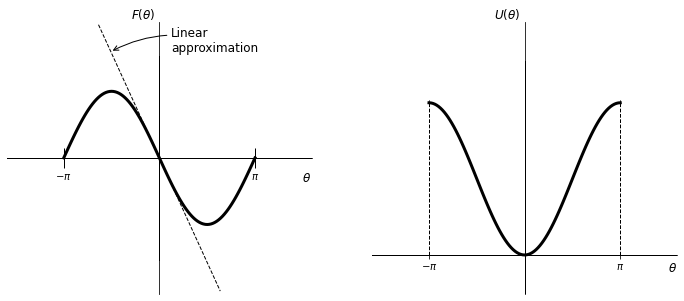

In [59]:
import numpy as np
import matplotlib.pyplot as plt
count = 0

m = 1
g = 9.8
l = 1

start =  -np.pi
end = np.pi
resolution = 100

theta = [0]*(resolution+1)
thetaL = np.linspace(-2, 2, 100)

for i in np.arange(start, end, (end - start)/resolution):
    theta[count] = i
    count = count + 1
    
theta[resolution] = end
theta = np.array(theta)
    
F = -m*g*np.sin(theta)
f = -m*g*thetaL
U = m*g*l*(1- np.cos(theta))

fig, p10 = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

p10[0].plot(theta, F,'-k', lw=3)
p10[0].plot(thetaL, f,'--k', lw=1, label='Linear appr.')
p10[0].plot([-5, 5], [0, 0], 'k', lw=1)
p10[0].plot([0, 0], [-15, 15], 'k', lw=1)
p10[0].set_xticks([-np.pi, np.pi])
p10[0].set_xticklabels(['$-\pi$', '$\pi$'])
p10[0].tick_params(direction='inout', length=20, width=1, colors='k')

p10[0].annotate('Linear'"\n"'approximation',
             xy=(thetaL[10], f[10]+0), xycoords='data',
             xytext=(+60, +0), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

p10[0].set_yticks([])
p10[0].set_yticklabels([])
p10[0].set_xlim([-5, 5])
p10[0].set_ylim([-20, 20])
p10[0].set_xlabel(r'$\theta$', loc='right', fontsize=12, labelpad=-10)
p10[0].set_ylabel(r'$F(\theta)$', loc='top' ,rotation=0, fontsize=12)

p10[0].spines['right'].set_visible(False)
p10[0].spines['top'].set_visible(False)
p10[0].xaxis.set_ticks_position('bottom')
p10[0].spines['bottom'].set_position(('data',0))
p10[0].yaxis.set_ticks_position('left')
p10[0].spines['left'].set_position(('data',0))

p10[1].plot(theta, U,'-k', lw=3)
p10[1].plot([-5, 5], [0, 0], 'k', lw=1)
p10[1].plot([0, 0], [-5, 25], 'k', lw=1)
p10[1].plot([np.pi, np.pi], [0, 20], '--k', lw=1)
p10[1].plot([-np.pi, -np.pi], [0, 20], '--k', lw=1)
p10[1].set_xticks([-np.pi, np.pi])
p10[1].set_xticklabels(['$-\pi$', '$\pi$'])
p10[1].set_yticks([])
p10[1].set_yticklabels([])
p10[1].set_xlim([-5, 5])
p10[1].set_ylim([-5, 30])
p10[1].set_xlabel(r"$\theta$", loc='right', fontsize=12, labelpad=-10)
p10[1].set_ylabel(r"$U(\theta)$", loc='top' ,rotation=0, fontsize=12)

p10[1].spines['right'].set_visible(False)
p10[1].spines['top'].set_visible(False)
p10[1].xaxis.set_ticks_position('bottom')
p10[1].spines['bottom'].set_position(('data',0))
p10[1].yaxis.set_ticks_position('left')
p10[1].spines['left'].set_position(('data',0))


### Euler Method

&emsp; In *Euler Method*, we update $\theta (t)$ and $\dot{\theta} (t)$ as follow

$$
    \theta(t + \delta) = \theta(t) + \dot{\theta}(t) \delta
$$

$$
    \dot{\theta}(t + \delta) = \dot{\theta}(t) + \ddot{\theta}(t) \delta
$$

where $\delta$ means a small timespan. With $\ddot{\theta}(t) = -(g/l) \sin{(\theta)}$. We have to supply the **Initial Speed** $\dot{\theta}_0$ and **Initial Anhle** $\theta_0$.

(0.0, 5.0)

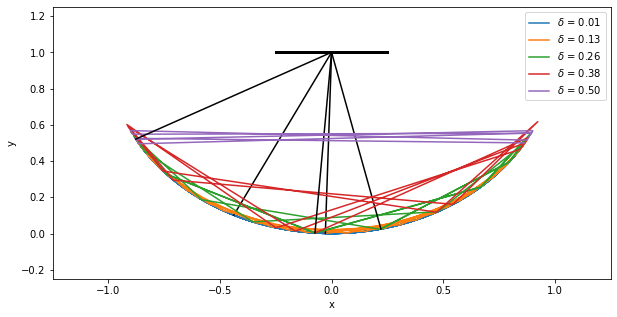

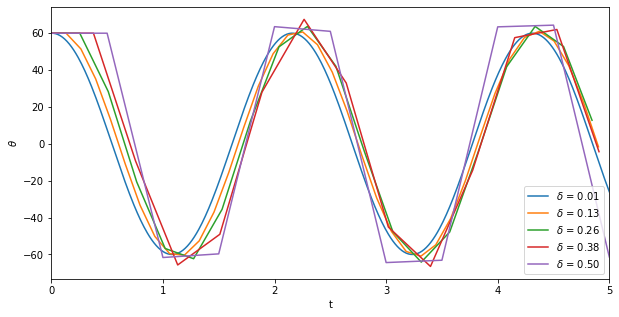

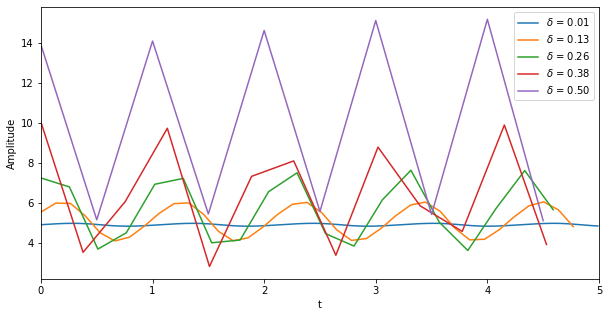

In [1]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

tL = 5      # Time Length
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius
m = 1       # mass

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.01  # Min Delta
MaxTSpan = 0.5   # Max Delta
NTSpan = 5      # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, p2D = plt.subplots(figsize=(10,5)) # Position and Waveform
fig, pW = plt.subplots(figsize=(10,5)) # Waveform
fig, pE = plt.subplots(figsize=(10,5)) # Looking for Total Energy

for delta in TSpan:
    N = int(tL/delta) + 1
    t = np.arange(N) * delta
    tE = np.arange(N-1) * delta
    
    T = np.empty(N-1)
    U = np.empty(N-1)
    E = np.empty(N-1)
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        theta[ca+1] = theta[ca] + dtheta[ca] * delta
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca+1])) * delta
        T[ca] = (1/2)*m*(L**2)*((dtheta[ca+1])**2)
        U[ca] = m*g*L*(1-np.cos(theta[ca+1]))
        E[ca] = T[ca] + U[ca]
    
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
    lable_nameA = '$\delta$ = ' + str('%.2f' % delta)
    p2D.plot(x, y, label = lable_nameA)
    p2D.plot([0, L*np.sin(theta[N-1])], [L, L-L*np.cos(theta[N-1])], '-k') # Show The Last Rob
    
    lable_nameB = '$\delta$ = ' + str('%.2f' % delta)
    pW.plot(t, (theta/np.pi)*180, label = lable_nameB)
    #pE.plot(tE, T)
    #pE.plot(tE, U)
    pE.plot(tE, E, label = lable_nameB)

p2D.plot([-L/4, L/4],[L, L],'-k', lw=3)
p2D.legend()
p2D.set_xlabel('x')
p2D.set_ylabel('y')
p2D.set_xlim([-1.25*L, 1.25*L])
p2D.set_ylim([-0.25, 1.25*L])
pW.legend()
pW.set_xlabel('t')
pW.set_ylabel(r"$\theta$")
pW.set_xlim([0, tL])
pE.legend()
pE.set_xlabel('t')
pE.set_ylabel('Amplitude')
pE.set_xlim([0, tL])

Text(0, 0.5, '$\\theta$')

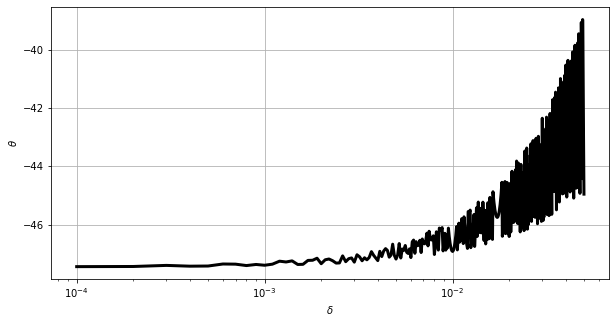

In [16]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 3       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.0001  # Min Delta
MaxTSpan = 0.05   # Max Delta
NTSpan = 500     # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, pEP = plt.subplots(figsize=(10,5)) # End Point with Different Delta

for delta in TSpan:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        theta[ca+1] = theta[ca] + dtheta[ca] * delta
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca+1])) * delta
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
pEP.plot(TSpan, (EndAngle/np.pi)*180, '-k', lw=3)
pEP.set_xscale('log')
pEP.grid()
pEP.set_xlabel(r"$\delta$")
pEP.set_ylabel(r"$\theta$")

(-10.0, 10.0)

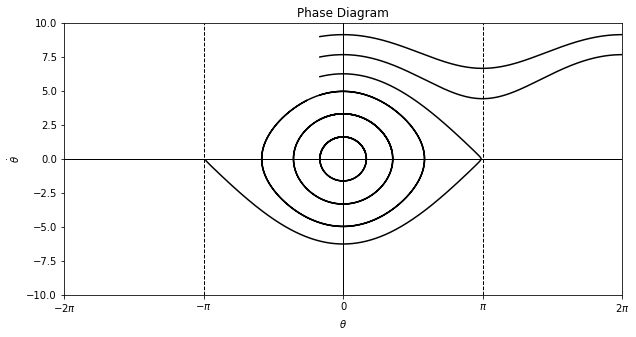

In [5]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 5       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed_P = [0, 2.9, 4.7, 6.05, 7.5, 9]
initial_angle = -30 # in degree

delta = 0.0005

fig, pPD = plt.subplots(figsize=(10,5))    # Phase Diagram

for initial_speed in initial_speed_P:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        theta[ca+1] = theta[ca] + dtheta[ca] * delta
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca+1])) * delta
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    cb = cb + 1

    pPD.plot(+theta, +dtheta, 'k')
    #pPD.plot(-theta, +dtheta, 'k')
    #pPD.plot(+theta+2*np.pi, dtheta, 'k')
    #pPD.plot(-theta-2*np.pi, dtheta, 'k')
    #pPD.plot(+theta, -dtheta, 'k')
    #pPD.plot(-theta, -dtheta, 'k')

pPD.set_title('Phase Diagram')
pPD.set_xlabel(r"$\theta$")
pPD.set_ylabel(r"$\dot{\theta}$")
pPD.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
pPD.set_xticklabels(['$-2 \pi$', '$-\pi$', 0, '$\pi$', '$2 \pi$'])
pPD.plot([-2*np.pi, +2*np.pi],[0, 0],'-k', lw=1)
pPD.plot([0, 0],[-10, 10],'-k', lw=1)
pPD.plot([-np.pi, -np.pi],[-10, 10],'--k', lw=1)
pPD.plot([+np.pi, +np.pi],[-10, 10],'--k', lw=1)
pPD.set_xlim([-np.pi*2, np.pi*2])
pPD.set_ylim([-10, +10])

### Symplectic Algorithm

&emsp; In *Symplectic Algorithm*, we update $\theta (t)$ and $\dot{\theta} (t)$ as follow

$$
    \dot{\theta}(t + \delta) = \dot{\theta}(t) + \ddot{\theta}(t) \delta
$$

$$
    \theta(t + \delta) = \theta(t) + \dot{\theta}(t + \delta) \delta
$$

where $\delta$ means a small timespan. With $\ddot{\theta}(t) = -(g/l) \sin{(\theta)}$. We have to supply the **Initial Speed** $\dot{\theta}_0$ and **Initial Anhle** $\theta_0$.

(0.0, 5.0)

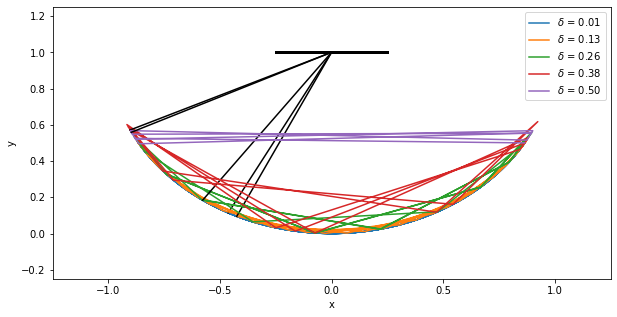

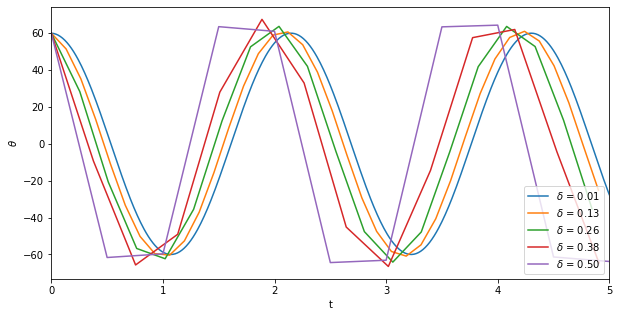

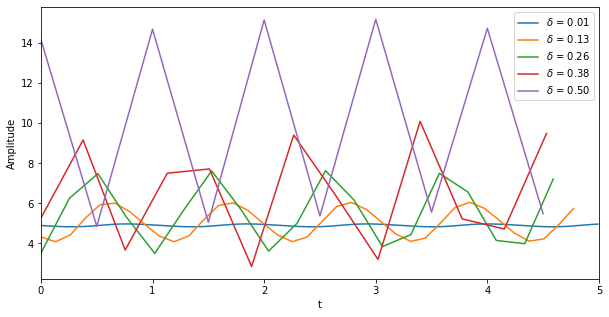

In [13]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

tL = 5      # Time Length
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius
m = 1       # mass

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.01  # Min Delta
MaxTSpan = 0.5   # Max Delta
NTSpan = 5      # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, p2D = plt.subplots(figsize=(10,5)) # Position and Waveform
fig, pW = plt.subplots(figsize=(10,5)) # Waveform
fig, pE = plt.subplots(figsize=(10,5)) # Looking for Total Energy

for delta in TSpan:
    N = int(tL/delta) + 1
    t = np.arange(N) * delta
    tE = np.arange(N-1) * delta
    
    T = np.empty(N-1)
    U = np.empty(N-1)
    E = np.empty(N-1)
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta
        theta[ca+1] = theta[ca] + dtheta[ca+1] * delta
        
        T[ca] = (1/2)*m*(L**2)*((dtheta[ca+1])**2)
        U[ca] = m*g*L*(1-np.cos(theta[ca+1]))
        E[ca] = T[ca] + U[ca]
    
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
    lable_nameA = '$\delta$ = ' + str('%.2f' % delta)
    p2D.plot(x, y, label = lable_nameA)
    p2D.plot([0, L*np.sin(theta[N-1])], [L, L-L*np.cos(theta[N-1])], '-k') # Show The Last Rob
    
    lable_nameB = '$\delta$ = ' + str('%.2f' % delta)
    pW.plot(t, (theta/np.pi)*180, label = lable_nameB)
    #pE.plot(tE, T)
    #pE.plot(tE, U)
    pE.plot(tE, E, label = lable_nameB)

p2D.plot([-L/4, L/4],[L, L],'-k', lw=3)
p2D.legend()
p2D.set_xlabel('x')
p2D.set_ylabel('y')
p2D.set_xlim([-1.25*L, 1.25*L])
p2D.set_ylim([-0.25, 1.25*L])
pW.legend()
pW.set_xlabel('t')
pW.set_ylabel(r"$\theta$")
pW.set_xlim([0, tL])
pE.legend()
pE.set_xlabel('t')
pE.set_ylabel('Amplitude')
pE.set_xlim([0, tL])

Text(0, 0.5, '$\\theta$')

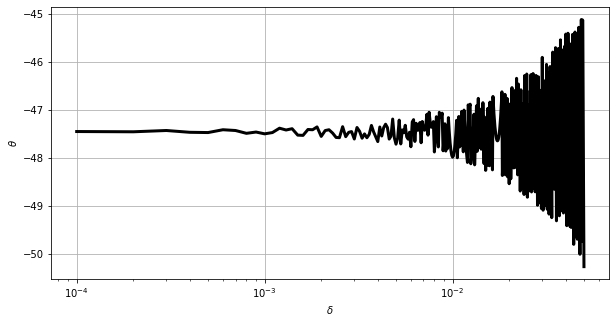

In [15]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 3       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.0001  # Min Delta
MaxTSpan = 0.05   # Max Delta
NTSpan = 500     # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, pEP = plt.subplots(figsize=(10,5)) # End Point with Different Delta

for delta in TSpan:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta
        theta[ca+1] = theta[ca] + dtheta[ca+1] * delta
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
pEP.plot(TSpan, (EndAngle/np.pi)*180, '-k', lw=3)
pEP.set_xscale('log')
pEP.grid()
pEP.set_xlabel(r"$\delta$")
pEP.set_ylabel(r"$\theta$")

(-10.0, 10.0)

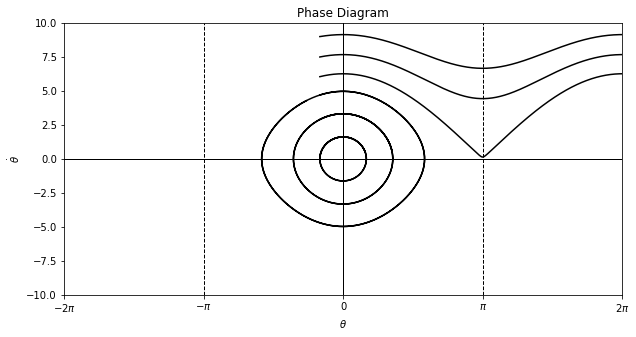

In [9]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 5       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed_P = [0, 2.9, 4.7, 6.05, 7.5, 9]
initial_angle = -30 # in degree

delta = 0.0005

fig, pPD = plt.subplots(figsize=(10,5))    # Phase Diagram

for initial_speed in initial_speed_P:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta[ca+1] = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta
        theta[ca+1] = theta[ca] + dtheta[ca+1] * delta
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    cb = cb + 1

    pPD.plot(+theta, +dtheta, 'k')
    #pPD.plot(-theta, +dtheta, 'k')
    #pPD.plot(+theta+2*np.pi, dtheta, 'k')
    #pPD.plot(-theta-2*np.pi, dtheta, 'k')
    #pPD.plot(+theta, -dtheta, 'k')
    #pPD.plot(-theta, -dtheta, 'k')

pPD.set_title('Phase Diagram')
pPD.set_xlabel(r"$\theta$")
pPD.set_ylabel(r"$\dot{\theta}$")    
pPD.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
pPD.set_xticklabels(['$-2 \pi$', '$-\pi$', 0, '$\pi$', '$2 \pi$'])
pPD.plot([-2*np.pi, +2*np.pi],[0, 0],'-k', lw=1)
pPD.plot([0, 0],[-10, 10],'-k', lw=1)
pPD.plot([-np.pi, -np.pi],[-10, 10],'--k', lw=1)
pPD.plot([+np.pi, +np.pi],[-10, 10],'--k', lw=1)
pPD.set_xlim([-np.pi*2, np.pi*2])
pPD.set_ylim([-10, +10])

### Verlet Algorithm

&emsp; In *Verlet Algorithm*, we update $\theta (t)$ and $\dot{\theta} (t)$ as follow

$$
    \dot{\theta}(t + \frac{\delta}{2}) = \dot{\theta}(t) + \frac{\ddot{\theta}(t)}{2} \delta
$$

$$
    \theta(t + \delta) = \theta(t) + \dot{\theta}(t + \frac{\delta}{2}) \delta
$$

$$
    \dot{\theta}(t + \delta) = \dot{\theta}(t + \frac{\delta}{2}) + \frac{\ddot{\theta}(t + \delta)}{2} \delta
$$

where $\delta$ means a small timespan. With $\ddot{\theta}(t) = -(g/l) \sin{(\theta)}$. We have to supply the **Initial Speed** $\dot{\theta}_0$ and **Initial Anhle** $\theta_0$.

(0.0, 5.0)

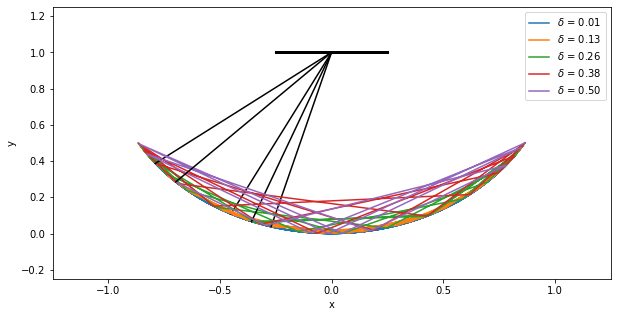

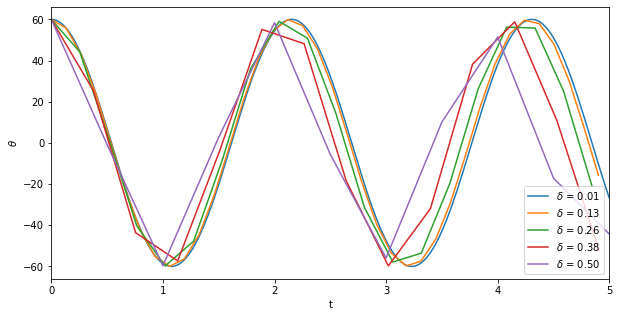

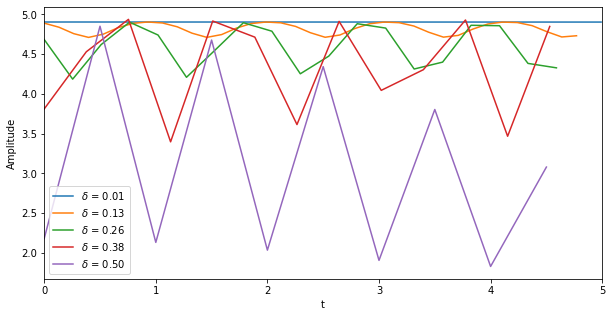

In [5]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

tL = 5      # Time Length
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius
m = 1       # mass

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.01  # Min Delta
MaxTSpan = 0.5   # Max Delta
NTSpan = 5      # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, p2D = plt.subplots(figsize=(10,5)) # Position and Waveform
fig, pW = plt.subplots(figsize=(10,5)) # Waveform
fig, pE = plt.subplots(figsize=(10,5)) # Looking for Total Energy

for delta in TSpan:
    N = int(tL/delta) + 1
    t = np.arange(N) * delta
    tE = np.arange(N-1) * delta
    
    T = np.empty(N-1)
    U = np.empty(N-1)
    E = np.empty(N-1)
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta_h = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta/2
        theta[ca+1] = theta[ca] + dtheta_h * delta
        dtheta[ca+1] = dtheta_h + (-(g/L)*np.sin(theta[ca+1])) * delta/2
        
        T[ca] = (1/2)*m*(L**2)*((dtheta[ca+1])**2)
        U[ca] = m*g*L*(1-np.cos(theta[ca+1]))
        E[ca] = T[ca] + U[ca]
    
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
    lable_nameA = '$\delta$ = ' + str('%.2f' % delta)
    p2D.plot(x, y, label = lable_nameA)
    p2D.plot([0, L*np.sin(theta[N-1])], [L, L-L*np.cos(theta[N-1])], '-k') # Show The Last Rob
    
    lable_nameB = '$\delta$ = ' + str('%.2f' % delta)
    pW.plot(t, (theta/np.pi)*180, label = lable_nameB)
    #pE.plot(tE, T)
    #pE.plot(tE, U)
    pE.plot(tE, E, label = lable_nameB)

p2D.plot([-L/4, L/4],[L, L],'-k', lw=3)
p2D.legend()
p2D.set_xlabel('x')
p2D.set_ylabel('y')
p2D.set_xlim([-1.25*L, 1.25*L])
p2D.set_ylim([-0.25, 1.25*L])
pW.legend()
pW.set_xlabel('t')
pW.set_ylabel(r"$\theta$")
pW.set_xlim([0, tL])
pE.legend()
pE.set_xlabel('t')
pE.set_ylabel('Amplitude')
pE.set_xlim([0, tL])

Text(0, 0.5, '$\\theta$')

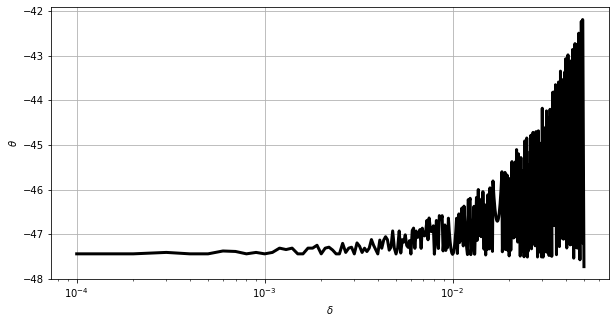

In [14]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 3       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed = 0
initial_angle = 60 # in Degrees

MinTSpan = 0.0001  # Min Delta
MaxTSpan = 0.05   # Max Delta
NTSpan = 500     # Total Tested Delta Numbers

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)
EndAngle = np.empty(NTSpan)

fig, pEP = plt.subplots(figsize=(10,5)) # End Point with Different Delta

for delta in TSpan:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta_h = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta/2
        theta[ca+1] = theta[ca] + dtheta_h * delta
        dtheta[ca+1] = dtheta_h + (-(g/L)*np.sin(theta[ca+1])) * delta/2
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    EndAngle[cb] = theta[N-1]
    cb = cb + 1
    
pEP.plot(TSpan, (EndAngle/np.pi)*180, '-k', lw=3)
pEP.set_xscale('log')
pEP.grid() 
pEP.set_xlabel(r"$\delta$")
pEP.set_ylabel(r"$\theta$")

(-10.0, 10.0)

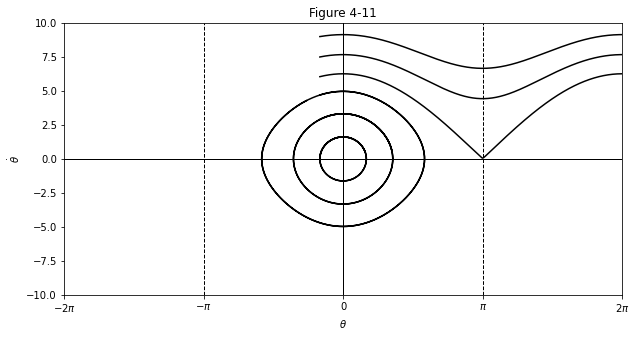

In [1]:
import numpy as np
import matplotlib.pyplot as plt
ca = 0 # Counter a
cb = 0 # Counter b

T = 5       # Time Span
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_speed_P = [0, 2.9, 4.7, 6.05, 7.5, 9]
initial_angle = -30 # in degree

delta = 0.0005
fig, pPD = plt.subplots(figsize=(10,5))    # Phase Diagram

for initial_speed in initial_speed_P:
    N = int(T/delta) + 1
    t = np.arange(N) * delta
    
    theta = np. empty(N)
    dtheta = np.empty(N)
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for ca in range(N-1):
        dtheta_h = dtheta[ca] + (-(g/L)*np.sin(theta[ca])) * delta/2
        theta[ca+1] = theta[ca] + dtheta_h * delta
        dtheta[ca+1] = dtheta_h + (-(g/L)*np.sin(theta[ca+1])) * delta/2
        
    x = L*np.sin(theta)
    y = L-L*np.cos(theta)
    
    cb = cb + 1
    
    pPD.plot(+theta, +dtheta, 'k')

pPD.set_title('Figure 4-11')
pPD.set_xlabel(r"$\theta$")
pPD.set_ylabel(r"$\dot{\theta}$") 
pPD.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
pPD.set_xticklabels(['$-2 \pi$', '$-\pi$', 0, '$\pi$', '$2 \pi$'])
pPD.plot([-2*np.pi, +2*np.pi],[0, 0],'-k', lw=1)
pPD.plot([0, 0],[-10, 10],'-k', lw=1)
pPD.plot([-np.pi, -np.pi],[-10, 10],'--k', lw=1)
pPD.plot([+np.pi, +np.pi],[-10, 10],'--k', lw=1)
pPD.set_xlim([-np.pi*2, np.pi*2])
pPD.set_ylim([-10, +10])


&emsp; We may construct the phase diagram for the plane pendulum in **Figure 4-11** because **Equation 4.26** provides the necessary relationship $\dot{\theta} = \dot{\theta}(\theta)$ . The parameter 6g specifies the total energy through Equation 4.24. If $\theta$ and $\theta_0$ are small angles, then **Equation 4.26** can be written as

$$
    (\sqrt{\frac{l}{g}} \dot{\theta})^2 + \theta^2 \approx \theta^2_0 \tag{4.30}
$$

If the coordinates of the phase plane are $\theta$ and $\dot{\theta}/\sqrt{g/l}$, then the phase paths near $\theta = 0$ are approximately circles. This result is expected, because for small $\theta_0$, the motion is approximately simple harmonic. 


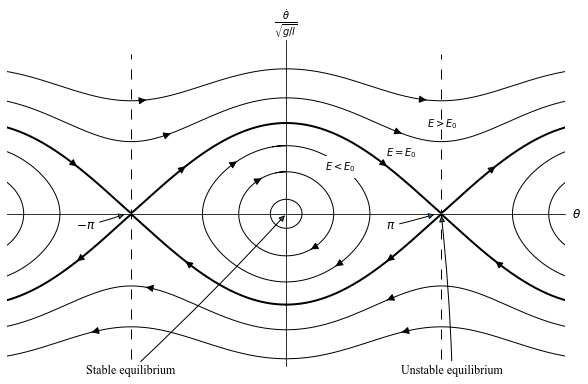

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def add_arrow(line, position=None, direction='right', size=15, color=None):

    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
 
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('', xytext=(xdata[start_ind], ydata[start_ind]), xy=(xdata[end_ind], ydata[end_ind]), 
                       arrowprops=dict(arrowstyle="-|>", color=color), size=size)


ca = 0 # Counter a
cb = 0 # Counter b

Ta = [2, 2.2, 2.5]
Tb = 5      # Time Span

g = 9.80665 # Gravitational Acceleration
L = 1       # Radius

initial_angle = 0  # in degree
initial_speed_Pa = [1, 2.9, 4.7]
initial_speed_Pb = [6.2635, 8, 10]

delta = 0.0005
fig, pPD = plt.subplots(figsize=(10,6))

#Line a0
Na0 = int(Ta[0]/delta) + 1
thetaa0 = np.empty(Na0)
dthetaa0 = np.empty(Na0)
thetaa0[0] = (initial_angle/180)*np.pi
dthetaa0[0] = initial_speed_Pa[0]

for i in range(Na0-1):
    dtheta_h = dthetaa0[i] + (-(g/L)*np.sin(thetaa0[i])) * delta/2
    thetaa0[i+1] = thetaa0[i] + dtheta_h * delta
    dthetaa0[i+1] = dtheta_h + (-(g/L)*np.sin(thetaa0[i+1])) * delta/2
        
xa0 = L*np.sin(thetaa0)
ya0 = L-L*np.cos(thetaa0)
   
linea0 = pPD.plot(+thetaa0, +dthetaa0, 'k', lw=1)[0]
pPD.plot(thetaa0 + 2*np.pi, +dthetaa0, 'k', lw=1)
pPD.plot(thetaa0 - 2*np.pi, +dthetaa0, 'k', lw=1)

#Line a1
Na1 = int(Ta[1]/delta) + 1
thetaa1 = np.empty(Na1)
dthetaa1 = np.empty(Na1)
thetaa1[0] = (initial_angle/180)*np.pi
dthetaa1[0] = initial_speed_Pa[1]

for i in range(Na1-1):
    dtheta_h = dthetaa1[i] + (-(g/L)*np.sin(thetaa1[i])) * delta/2
    thetaa1[i+1] = thetaa1[i] + dtheta_h * delta
    dthetaa1[i+1] = dtheta_h + (-(g/L)*np.sin(thetaa1[i+1])) * delta/2
        
xa1 = L*np.sin(thetaa1)
ya1 = L-L*np.cos(thetaa1)
linea1 = pPD.plot(-thetaa1, +dthetaa1, 'k', lw=1)[0]

add_arrow(linea1, 0.5, 'left')
add_arrow(linea1, -0.5, 'left')

pPD.plot(thetaa1 + 2*np.pi, +dthetaa1, 'k', lw=1)
pPD.plot(thetaa1 - 2*np.pi, +dthetaa1, 'k', lw=1)

#Line a2

Na2 = int(Ta[2]/delta) + 1
thetaa2 = np.empty(Na2)
dthetaa2 = np.empty(Na2)
thetaa2[0] = (initial_angle/180)*np.pi
dthetaa2[0] = initial_speed_Pa[2]

for i in range(Na2-1):
    dtheta_h = dthetaa2[i] + (-(g/L)*np.sin(thetaa2[i])) * delta/2
    thetaa2[i+1] = thetaa2[i] + dtheta_h * delta
    dthetaa2[i+1] = dtheta_h + (-(g/L)*np.sin(thetaa2[i+1])) * delta/2
        
xa2 = L*np.sin(thetaa2)
ya2 = L-L*np.cos(thetaa2)
linea2 = pPD.plot(-thetaa2, +dthetaa2, 'k', lw=1)[0]

add_arrow(linea2, 1, 'left')
add_arrow(linea2, -1, 'left')

pPD.plot(thetaa2 + 2*np.pi, +dthetaa2, 'k', lw=1)
pPD.plot(thetaa2 - 2*np.pi, +dthetaa2, 'k', lw=1)


#Line b0

Nb0 = int(Tb/delta) + 1
thetab0 = np.empty(Nb0)
dthetab0 = np.empty(Nb0)
thetab0[0] = (initial_angle/180)*np.pi
dthetab0[0] = initial_speed_Pb[0]

for i in range(Nb0-1):
    dtheta_h = dthetab0[i] + (-(g/L)*np.sin(thetab0[i])) * delta/2
    thetab0[i+1] = thetab0[i] + dtheta_h * delta
    dthetab0[i+1] = dtheta_h + (-(g/L)*np.sin(thetab0[i+1])) * delta/2
        
xb0 = L*np.sin(thetab0)
yb0 = L-L*np.cos(thetab0)
lineb0UR = pPD.plot(+thetab0, +dthetab0, 'k', lw=2)[0]
lineb0UL = pPD.plot(-thetab0, +dthetab0, 'k', lw=2)[0]
lineb0DR = pPD.plot(+thetab0, -dthetab0, 'k', lw=2)[0]
lineb0DL = pPD.plot(-thetab0, -dthetab0, 'k', lw=2)[0]

add_arrow(lineb0UR, +np.pi-1.1, 'right')
add_arrow(lineb0UL, -np.pi+1.1, 'left')
add_arrow(lineb0UR, +np.pi+1.1, 'right')
add_arrow(lineb0UL, -np.pi-1.1, 'left')
add_arrow(lineb0DR, +np.pi-1.1, 'left')
add_arrow(lineb0DL, -np.pi+1.1, 'right')
add_arrow(lineb0DR, +np.pi+1.1, 'left')
add_arrow(lineb0DL, -np.pi-1.1, 'right')

#Line b1

Nb1 = int(Tb/delta) + 1
thetab1 = np.empty(Nb1)
dthetab1 = np.empty(Nb1)
thetab1[0] = (initial_angle/180)*np.pi
dthetab1[0] = initial_speed_Pb[1]

for i in range(Nb1-1):
    dtheta_h = dthetab1[i] + (-(g/L)*np.sin(thetab1[i])) * delta/2
    thetab1[i+1] = thetab1[i] + dtheta_h * delta
    dthetab1[i+1] = dtheta_h + (-(g/L)*np.sin(thetab1[i+1])) * delta/2
        
xb1 = L*np.sin(thetab1)
yb1 = L-L*np.cos(thetab1)
lineb1UR = pPD.plot(+thetab1, +dthetab1, 'k', lw=1)[0]
lineb1UL = pPD.plot(-thetab1, +dthetab1, 'k', lw=1)[0]
lineb1DR = pPD.plot(+thetab1, -dthetab1, 'k', lw=1)[0]
lineb1DL = pPD.plot(-thetab1, -dthetab1, 'k', lw=1)[0]

add_arrow(lineb1UR, +np.pi-0.8, 'right')
add_arrow(lineb1UL, -np.pi+0.8, 'left')

add_arrow(lineb1DR, +np.pi-1.1, 'left')
add_arrow(lineb1DL, -np.pi+0.3, 'right')


#Line b2

Nb2 = int(Tb/delta) + 1
thetab2 = np.empty(Nb2)
dthetab2 = np.empty(Nb2)
thetab2[0] = (initial_angle/180)*np.pi
dthetab2[0] = initial_speed_Pb[2]

for i in range(Nb2-1):
    dtheta_h = dthetab2[i] + (-(g/L)*np.sin(thetab2[i])) * delta/2
    thetab2[i+1] = thetab2[i] + dtheta_h * delta
    dthetab2[i+1] = dtheta_h + (-(g/L)*np.sin(thetab2[i+1])) * delta/2
        
xb2 = L*np.sin(thetab2)
yb2 = L-L*np.cos(thetab2)
lineb2UR = pPD.plot(+thetab2, +dthetab2, 'k', lw=1)[0]
lineb2UL = pPD.plot(-thetab2, +dthetab2, 'k', lw=1)[0]
lineb2DR = pPD.plot(+thetab2, -dthetab2, 'k', lw=1)[0]
lineb2DL = pPD.plot(-thetab2, -dthetab2, 'k', lw=1)[0]

add_arrow(lineb2UR, +np.pi-0.3, 'right')
add_arrow(lineb2UL, -np.pi+0.3, 'left')

add_arrow(lineb2DR, +np.pi-0.8, 'left')
add_arrow(lineb2DL, -np.pi-0.8, 'right')

pPD.set_xlabel(r'$\theta$', fontsize=12, fontname='Times New Roman')
pPD.xaxis.set_label_coords(1.02, 0.485)
pPD.set_ylabel(r'$\frac{\dot{\theta}}{\sqrt{g/l}}$', rotation=0, fontsize=14, fontname='Times New Roman')
pPD.yaxis.set_label_coords(0.5, 1)

pPD.plot([-np.pi, -np.pi],[-10, 11],'--k', dashes=(10, 10), lw=1)
pPD.plot([+np.pi, +np.pi],[-10, 11],'--k', dashes=(10, 10), lw=1)
pPD.set_xlim([-np.pi*1.8, np.pi*1.8])
pPD.set_ylim([-10.5, +12])

pPD.set_xticks([])
pPD.set_yticks([])
pPD.spines['right'].set_visible(False)
pPD.spines['top'].set_visible(False)
pPD.xaxis.set_ticks_position('bottom')
pPD.spines['bottom'].set_position(('data',0))
pPD.yaxis.set_ticks_position('left')
pPD.spines['left'].set_position(('data',0))

pPD.annotate(r'$-\pi$', xy=(-np.pi-0.1, 0), xycoords='data',
             xytext=(-50, -15), textcoords='offset points', fontsize=12, fontname='Times New Roman',
             arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=.02"))

pPD.annotate(r'$\pi$', xy=(np.pi-0.1, 0), xycoords='data',
             xytext=(-50, -15), textcoords='offset points', fontsize=12, fontname='Times New Roman',
             arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=.02"))

pPD.annotate('Stable equilibrium', xy=(0, 0), xycoords='data',
             xytext=(-200, -160), textcoords='offset points', fontsize=12, fontname='Times New Roman',
             arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=.02"))

pPD.annotate('Unstable equilibrium', xy=(np.pi, 0), xycoords='data',
             xytext=(-40, -160), textcoords='offset points', fontsize=12, fontname='Times New Roman',
             arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=.02"))

ta = pPD.text(np.pi/4, 3, r'$E<E_0$', fontsize=10,)
ta.set_bbox(dict(facecolor='white', alpha=1, edgecolor='none'))

tb = pPD.text(np.pi/1.55, 4, r'$E=E_0$', fontsize=10)
tb.set_bbox(dict(facecolor='none', alpha=1, edgecolor='none'))

tc = pPD.text(np.pi/1.1, 6, r'$E>E_0$', fontsize=10)
tc.set_bbox(dict(facecolor='none', alpha=1, edgecolor='none'))

### Find Frequency or Period under Euler Method

因為 Euler Method 在不同的精度底下對模擬結果的影響較劇烈，故作為週期比較的依據

Text(0.5, 1.0, 'The Waveform')

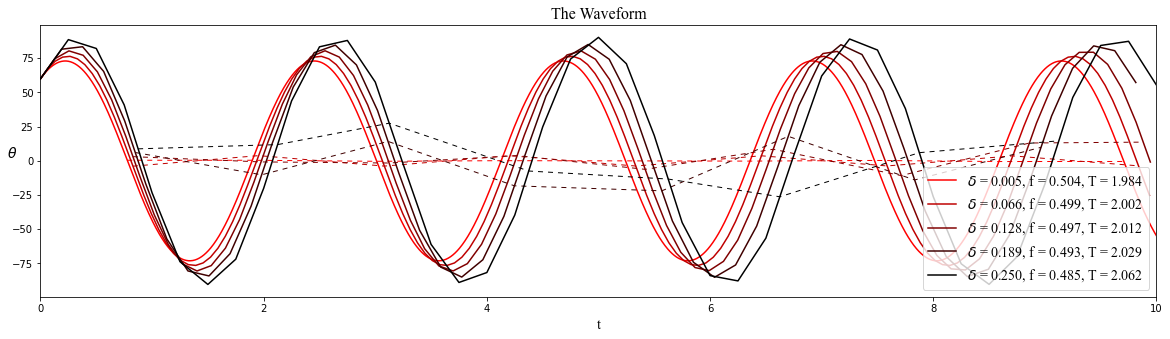

In [21]:
import numpy as np
import matplotlib.pyplot as plt

ca = 0 # Counter a
cb = 0 # Counter b
cc = 0 # Counter c

tL = 10      # Time Length
g = 9.80665 # Gravitational Acceleration
L = 1       # Radius
m = 1       # mass

initial_speed = 2
initial_angle = 60 # in Degrees

MinTSpan = 0.005  # Min Delta
MaxTSpan = 0.25   # Max Delta
NTSpan = 5      # Total Tested Delta Numbers

Start_R, Start_G, Start_B = 1, 0, 0
End_R,   End_G,   End_B   = 0, 0, 0

R_array = np.linspace(Start_R, End_R, NTSpan)
G_array = np.linspace(Start_G, End_G, NTSpan)
B_array = np.linspace(Start_B, End_B, NTSpan)

TSpan = np.linspace(MinTSpan, MaxTSpan, NTSpan)

fig, pW = plt.subplots(figsize=(20,5)) 

for delta in TSpan:
    N = int(tL/delta) + 1
    t = np.arange(N) * delta
    
    f0 = np.zeros(N)
    t0 = np.zeros(N)
    
    theta = np.zeros(N)
    dtheta = np.zeros(N)
    
    theta[0] = (initial_angle/180)*np.pi
    dtheta[0] = initial_speed
    
    for i in range(N-1):
        theta[i+1] = theta[i] + dtheta[i] * delta
        dtheta[i+1] = dtheta[i] + (-(g/L)*np.sin(theta[i+1])) * delta
    
    k = (theta/np.pi)*180
    
    c = 0
    for i in range(N-1):
        if ((k[i+1]>=0 and k[i]<=0) or (k[i+1]<=0 and k[i]>=0)):
            f0[c] = ((k[i+1])+k[i])/2
            t0[c] = ((t[i+1])+t[i])/2
            c = c+1
        else:
            c = c
            
    ff = np.zeros(c)
    ft = np.zeros(c)
    
    for i in range(c):
        ff[i] = f0[i]
        ft[i] = t0[i]
    
    fta = np.zeros(c-1)
    
    for i in range(c-1):
        fta[i] = ft[i+1]-ft[i]
    
    avgT = 0
    for i in range(c-1):
        avgT = avgT+fta[i]
    
    avgT = (avgT/c)*2
    avgf = 1/avgT
    
    lable_name = '$\delta$ = ' + str('%.3f' % delta) + ', f = ' + str('%.3f' % avgf) + ', T = ' + str('%.3f' % avgT)
    pW.plot(t, k, '-', color=[R_array[cc], G_array[cc], B_array[cc]], label = lable_name)
    pW.plot(ft, ff, '--', color=[R_array[cc], G_array[cc], B_array[cc]], dashes=(5, 5), lw=1)
    
    cc = cc + 1

L = pW.legend(loc='lower right', fontsize=14)
plt.setp(L.texts, family='Times New Roman')
pW.set_xlabel('t', fontsize=14, fontname='Times New Roman')
pW.set_ylabel(r"$\theta$", fontsize=14, rotation=0, labelpad = 0, fontname='Times New Roman')
pW.set_xlim([0, tL])
pW.set_title('The Waveform', fontsize=16, fontname='Times New Roman')